### Saldías et al. Figure 01

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gspec
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import seawater as sw
%matplotlib inline

In [2]:
nc_file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_NCR_DS_7d.nc' 
can_file = '/Volumes/MOBY/ROMS-CTW/ocean_his_ctw_CR_DS_7d.nc'

yind = 400 # canyon axis y index
S0 = 35.0  # reference Salinity
with Dataset(can_file, 'r') as nbl:
    h = nbl.variables['h'][:]
    x_rho = (nbl.variables['x_rho'][:]-400E3)/1000
    y_rho = (nbl.variables['y_rho'][:]-400E3)/1000
    time = nbl.variables['ocean_time'][:]
    zeta = (nbl.variables['zeta'][:,0,:])
    temp = nbl.variables['temp'][0,:,50,50] # 50, 50 offshore station
    z_rho = nbl.variables['z_rho'][0,:,50,50]
    rho0 = nbl.variables['rho0'][:] # Mean density used in Boussinesq 

salt = S0*np.ones_like(temp)
pden = sw.pden(salt, temp, -z_rho)
n2, q, pave = sw.bfrq(salt,temp,-z_rho)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in sqrt


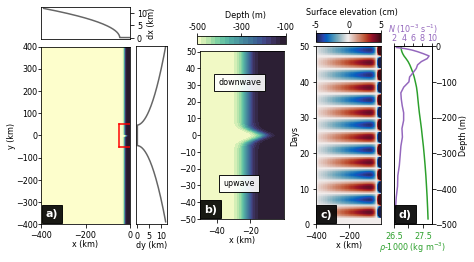

In [3]:
fig = plt.figure(figsize=(7,4))
plt.rcParams.update({'font.size': 8})
gs = GridSpec(2, 3, width_ratios=[2.4,1.6,2.2], height_ratios=[0.18,1],
              wspace=0.3,hspace=0.07, figure=fig)

gs0 = gspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs[1,0],
                                       hspace=0.0,wspace=0.1,width_ratios=[1,0.35])
gs1 = gspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs[0,0],
                                       hspace=0.0,wspace=0.1,width_ratios=[1,0.35])
gs2 = gspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs[1,2],
                                       hspace=0.0,wspace=0.25,width_ratios=[1.2,0.7])

ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs0[0, 0])
ax3 = fig.add_subplot(gs0[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs2[0, 0])
ax6 = fig.add_subplot(gs2[0, 1])

xlim = 53
ylim = 53

## ax1 X-spacing
ax1.plot(x_rho[ylim,1:],x_rho[ylim,1:]-x_rho[ylim,:-1],'0.4')
ax1.set_xticks([])
ax1.set_xlim(-400,0)
ax1.set_yticks([0,5,10])
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax1.set_ylabel('dx (km)',labelpad=0.5)

## ax2 domain bathymetry
pc2 = ax2.pcolormesh(x_rho,y_rho,-h, cmap=cmo.cm.deep, vmax=-100, vmin=-500)
ax2.plot((x_rho[ylim,xlim],x_rho[ylim,-1]),
         (y_rho[ylim,xlim], y_rho[ylim,xlim]), color='r')
ax2.plot((x_rho[-ylim,xlim],x_rho[-ylim,-1]),
         (y_rho[-ylim,xlim], y_rho[-ylim,-1]), color='r')
ax2.plot((x_rho[ylim,xlim],x_rho[-ylim,xlim]),
         (y_rho[ylim,xlim], y_rho[-ylim,xlim]), color='r')
ax2.set_aspect(1)
ax2.set_yticks([-400,-300,-200,-100,0,100,200,300,400])
ax2.set_xticks([-400,-200,0])
ax2.set_xlabel('x (km)', labelpad=0)
ax2.set_ylabel('y (km)', labelpad=-0.5)
ax2.set_ylim(-400,400)
ax2.yaxis.set_tick_params(pad=0)

## ax3 Y spacing
ax3.plot(y_rho[1:,xlim]-y_rho[:-1,xlim],y_rho[1:,xlim],'0.4')
ax3.set_yticks([])
ax3.set_ylim(-400,400)
ax3.set_xticks([0,5,10])
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_xlabel('dy (km)', labelpad=0)

## ax4 canyon bathymetry
levels = np.linspace(-500,-100,20)
cf4 = ax4.contourf(x_rho[ylim:-ylim,xlim:],y_rho[ylim:-ylim,xlim:],-h[ylim:-ylim,xlim:],
                   levels=levels,cmap=cmo.cm.deep, vmax=-100, vmin=-500)
cbar_ax = fig.add_axes([0.435, 0.75, 0.175, 0.03])
cb = fig.colorbar(cf4, cax=cbar_ax, orientation='horizontal',
                  ticks=[-500,-300,-100],format='%1.0f')
plt.text(0.3,1.2,'Depth (m)', transform=ax4.transAxes)
ax4.set_aspect(1)
ax4.set_yticks([-50,-40,-30,-20,-10,0,10,20,30,40,50])
ax4.yaxis.set_tick_params(pad=0)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_tick_params(pad=0)
ax4.set_xlabel('x (km)', labelpad=0)

## ax5 forcing wave
pc5 = ax5.pcolormesh(x_rho[1,:],(time)/(3600*24),100*zeta, 
                     cmap=cmo.cm.balance, vmax=5, vmin=-5)
ax5.set_xlabel('x (km)', labelpad=0)
ax5.set_ylabel('Days', labelpad=0)
cbar_ax2 = fig.add_axes([0.67, 0.76, 0.13, 0.03])
cb5 = fig.colorbar(pc5, cax=cbar_ax2, orientation='horizontal',
                  ticks=[-5,0,5],format='%1.0f')
cb5.ax.yaxis.set_tick_params(pad=0)
plt.text(-0.15,1.18,'Surface elevation (cm)', transform=ax5.transAxes)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_tick_params(pad=0)

## ax6 Initial density profile
color = 'tab:green'
ax6.plot(pden-1000, z_rho, color=color)
ax6.yaxis.set_label_position("right")
ax6.yaxis.tick_right()
ax6.set_ylabel('Depth (m)', labelpad=1.5)
ax6.set_xlabel(r'$\rho$-1000 (kg m$^{-3}$)', labelpad=0, color=color)
ax6.tick_params(axis='x', labelcolor=color)
ax6.yaxis.set_tick_params(pad=0.0)
ax6.set_ylim(-500,0)
ax6.set_xticks([26.5,27,27.5])
ax6.set_xticklabels(['26.5','','27.5'])
ax6.set_xlim(26.5,27.8)
## ax7 Initial stratification
ax7 = ax6.twiny()
color = 'tab:purple'
ax7.plot(np.sqrt(n2)/1E-3, z_rho[1:],color=color)
ax7.set_xlabel(r'$N$ ($10^{-3}$ s$^{-1}$)',color=color, labelpad=1)
ax7.set_ylabel(r'Depth (m)')
ax7.tick_params(axis='x', labelcolor=color)
ax7.xaxis.set_tick_params(pad=0.0)
ax7.set_xticks([2,4,6,8,10])

plt.text(0.05,0.04,'a)',transform=ax2.transAxes, color='w',fontsize=11, 
         bbox=dict(facecolor='black', alpha=0.9), fontweight='bold')
plt.text(0.05,0.042,'b)',transform=ax4.transAxes,color='w',fontsize=11,  
         bbox=dict(facecolor='black', alpha=0.9), fontweight='bold')
plt.text(0.06,0.04,'c)',transform=ax5.transAxes,color='w',fontsize=11, 
         bbox=dict(facecolor='black', alpha=0.9), fontweight='bold')
plt.text(0.13,0.04,'d)',transform=ax6.transAxes,color='w',fontsize=11, 
         bbox=dict(facecolor='black', alpha=0.9), fontweight='bold')

ax4.text(0.28,0.2,'upwave',transform=ax4.transAxes,color='k',fontsize=8, 
         bbox=dict(facecolor='white', alpha=0.9))
ax4.text(0.22,0.8,'downwave',transform=ax4.transAxes,color='k',fontsize=8, 
         bbox=dict(facecolor='white', alpha=0.9))

##
plt.savefig('Figure1.png',format='png',bbox_inches='tight', dpi=300)
plt.show()